### This notebook is destined to two things: feature scaling, and some miscellaneous exercises

* [<b>1. Feature scaling</b>](#1st-bullet)<br>   
* [<b>2. Exercises</b>](#2nd-bullet)<br>

Before anything else, let's import the libraries needed for today



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split

#scaling methods
# minmax
# standard
# robust
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# model
from sklearn.linear_model import LogisticRegression

# metric
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="1st-bullet">
    
## 1. Feature scaling

</a>
    
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.<br>
If feature scaling is not done, then a machine learning algorithm tends to weigh greater values higher and consider smaller values as the lower values, regardless of the unit of the values. The impact of scaling on prediction quality isn't always positive, but it's a very important step to take before feature selection.

    





### 1.1. Import the dataset

<b>1. Read the dataset from ``Datasets/winequality.csv``. Using the method `head()`, check the first 6 rows of the dataset.</b>

In [2]:
df = pd.read_csv("Datasets/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0




### 1.2. Data pre-processing, data partition and scaling

<b>2. Check if you have any missing values in the dataset. You can use the method `info()`from pandas.</b>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3920 non-null   float64
 1   volatile acidity      3920 non-null   float64
 2   citric acid           3920 non-null   float64
 3   residual sugar        3920 non-null   float64
 4   chlorides             3920 non-null   float64
 5   free sulfur dioxide   3920 non-null   float64
 6   total sulfur dioxide  3920 non-null   float64
 7   density               3920 non-null   float64
 8   pH                    3920 non-null   float64
 9   sulphates             3920 non-null   float64
 10  alcohol               3920 non-null   float64
 11  quality               3920 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.6 KB


<b>3.1 Define the independent variables as `X` and the dependent variable ('quality') as `y`. </b>

In [4]:
X = df.iloc[:, :-1]
y = df.quality


In [5]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
3915,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.0
3916,7.1,0.370,0.30,6.2,0.040,49.0,139.0,0.99021,3.17,0.27,13.6
3917,6.2,0.280,0.51,7.9,0.056,49.0,206.0,0.99560,3.18,0.52,9.4
3918,6.4,0.350,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.2


In [6]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3915    1
3916    0
3917    0
3918    1
3919    0
Name: quality, Length: 3920, dtype: int64

<b>4. By using the method `train_test_split()` from sklearn.model_selection, split your dataset into train(70%) and validation(30%).<br></b>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .30, 
    random_state=42,
    stratify=y, shuffle=True
)


### 1.3. Feature scaling


We will try three different scalers:
* StandardScaler - standardizes each feature by removing the mean and scaling to unit variance
* MinMaxScaler - scales each feature to a given range, defaults to [0,1]
* RobustScaler - scales each feature by removing the median and scaling according to a range between 2 quantiles that are equally distant from the median. More resistant to outliers<br>

All of these scalers were already imported above

**Standard Scaler:**
$$z=\frac{x - \bar{x}}{\sqrt{var(x)}} = \frac{x-\mu}{\sigma}$$
 **x** - original sample<br>**z** - scaled sample
 
sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'>sklearn.model_selection.StandardScaler()</a><br><br>
<b>5. Use the StandardScaler from sklearn.</b>

In [8]:
st_scaler = StandardScaler().fit(X_train)

In [9]:
X_train_scl_st = st_scaler.transform(X_train) # this will return an array
# Convert the array to a pandas dataframe
X_train_scl_st = pd.DataFrame(X_train_scl_st, columns = X_train.columns).set_index(X_train.index)
X_train_scl_st.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3053,0.766370,-1.043375,0.165112,-0.353689,-0.156217,-0.557709,-0.886727,0.027667,-0.671238,-0.158370,-0.781943
480,-0.303485,1.952252,-0.001090,0.496596,-0.109552,-0.261668,0.749566,0.729478,0.175033,0.957223,-1.027910
1789,1.004116,-0.743812,-0.832101,-0.914104,-0.902845,-0.557709,1.146951,-1.049761,-0.736335,2.158630,1.349770


<b>6. Using the same scaler, scale the numerical validation data.</b>


Note: The scaling should only consider the training data. In that way, we are going to use the values of the training dataset to scale also the validation dataset.

In [10]:
X_test_st = st_scaler.transform(X_test)

X_test_st = pd.DataFrame(X_test_st, columns = X_test.columns).set_index(X_test.index)
X_test_st.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
808,-1.135595,1.153418,-1.413809,1.095661,0.030441,1.751410,2.479361,1.124864,-0.280651,-0.930703,-1.191888
2548,-0.778976,-0.144687,0.663719,0.148752,-0.016224,1.573785,1.614463,0.413168,0.044838,0.356519,-0.781943
3215,0.172006,-1.342937,-0.084191,-1.030052,2.736969,-0.912958,-2.008756,-1.191441,-0.020260,1.300482,0.857837


**MinMax Scaler:**
$$m=\frac{x - min(x)}{max(x)-min(x)}$$
 **x** - original sample<br>**m** - scaled sample

sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html'>sklearn.model_selection.MinMaxScaler()</a><br><br>
<b>7. Repeat the last two steps, but using the MinMaxScaler with the default range (from 0 to 1).</b>


In [11]:
mM_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

In [12]:
X_train_mMscaled = mM_scaler.transform(X_train)

X_train_mMscaled = pd.DataFrame(X_train_mMscaled, columns = X_train.columns).set_index(X_train.index)
X_train_mMscaled.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3053,0.523077,0.101695,0.36,0.059816,0.097923,0.166090,0.258065,0.133191,0.336364,0.289157,0.241935
480,0.384615,0.440678,0.34,0.127301,0.100890,0.200692,0.454418,0.174486,0.454545,0.445783,0.193548
1789,0.553846,0.135593,0.24,0.015337,0.050445,0.166090,0.502104,0.069794,0.327273,0.614458,0.661290


In [13]:
X_test_mMscaled = mM_scaler.transform(X_test)

X_test_mMscaled = pd.DataFrame(X_test_mMscaled, columns = X_test.columns).set_index(X_test.index)
X_test_mMscaled.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
808,0.276923,0.350282,0.17,0.174847,0.109792,0.435986,0.661992,0.197751,0.390909,0.180723,0.161290
2548,0.323077,0.203390,0.42,0.099693,0.106825,0.415225,0.558205,0.155874,0.436364,0.361446,0.241935
3215,0.446154,0.067797,0.33,0.006135,0.281899,0.124567,0.123422,0.061458,0.427273,0.493976,0.564516
384,0.276923,0.316384,0.39,0.039877,0.053412,0.124567,0.322581,0.069794,0.600000,0.192771,0.532258
140,0.323077,0.259887,0.34,0.024540,0.106825,0.124567,0.187938,0.102753,0.527273,0.240964,0.354839


**Robust Scaler:**
$$r=\frac{x - Q_{1}(x)}{Q_{3}(x)- Q_{1}(x)}$$
 x - original sample<br>r - scaled sample<br>$Q_{1}$ - 1st quartile<br>$Q_{3}$ - 3rd quartile

sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html'>sklearn.model_selection.RobustScaler()</a><br><br>
<b>8. Repeat steps 5 and 6, but using the RobustScaler with the default quantiles (the quartiles).</b>

In [14]:
R_scaler = RobustScaler().fit(X_train)

In [15]:
X_train_Rscaled = R_scaler.transform(X_train)
X_train_Rscaled = pd.DataFrame(X_train_Rscaled, columns=X_train.columns).set_index(X_train.index)
X_train_Rscaled.head(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3053,0.7,-0.818182,0.307692,-0.061728,-0.071429,-0.347826,-0.566667,0.090447,-0.45,0.000000,-0.421053
480,-0.2,1.909091,0.153846,0.481481,0.000000,-0.130435,0.600000,0.572075,0.20,1.000000,-0.578947
1789,0.9,-0.545455,-0.615385,-0.419753,-1.214286,-0.347826,0.883333,-0.648954,-0.50,2.076923,0.947368
3356,-0.1,-0.545455,-0.307692,0.938272,0.357143,0.869565,0.000000,0.382137,0.05,-0.769231,0.210526
702,-0.3,1.090909,-1.076923,-0.469136,-0.071429,-0.608696,-0.866667,-0.264556,0.20,-0.153846,-0.105263


In [16]:
X_test_Rscaled = R_scaler.transform(X_test)
X_test_Rscaled = pd.DataFrame(X_test_Rscaled, columns=X_test.columns).set_index(X_test.index)

X_test_Rscaled.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
808,-0.9,1.181818,-1.153846,0.864198,0.214286,1.347826,1.833333,0.843414,-0.15,-0.692308,-0.684211
2548,-0.6,0.000000,0.769231,0.259259,0.142857,1.217391,1.216667,0.355003,0.10,0.461538,-0.421053
3215,0.2,-1.090909,0.076923,-0.493827,4.357143,-0.608696,-1.366667,-0.746184,0.05,1.307692,0.631579
384,-0.9,0.909091,0.538462,-0.222222,-1.142857,-0.608696,-0.183333,-0.648954,1.00,-0.615385,0.526316
140,-0.6,0.454545,0.153846,-0.345679,0.142857,-0.608696,-0.983333,-0.264556,0.60,-0.307692,-0.052632


Now, time to use our scaled data for some practice

<a class="anchor" id="2nd-bullet">  
    
# Exercises
</a>

## 1: Further explore the data

Just to get some further insight

<b>1. Get the main descriptive statistics for all the variables in `pData` using the method `.describe()`</b>

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,6.962870,0.275938,0.341370,6.364592,0.045564,35.566709,140.669133,0.994203,3.193077,0.488638,10.458291,0.227041
std,0.844844,0.100504,0.122957,5.103226,0.021924,16.965426,43.400711,0.002997,0.153216,0.114292,1.216308,0.418973
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991900,3.090000,0.410000,9.400000,0.000000
50%,6.900000,0.260000,0.320000,5.100000,0.043000,34.000000,138.000000,0.993900,3.180000,0.470000,10.300000,0.000000
75%,7.400000,0.320000,0.400000,9.800000,0.050000,46.250000,170.000000,0.996300,3.290000,0.550000,11.300000,0.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,1.000000


<b>2. What is the pearson correlation between all the variables? (HINT: Use the `cor_heatmap` function 
for a better visualization</b>

In [18]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.004668,0.285418,0.080002,0.011897,-0.074494,0.058732,0.235959,-0.439013,-0.020605,-0.079409,-0.106982
volatile acidity,-0.004668,1.000000,-0.133053,0.091201,0.072918,-0.092879,0.094736,0.061206,-0.067230,-0.049149,0.041156,-0.064078
citric acid,0.285418,-0.133053,1.000000,0.119747,0.112969,0.084260,0.107559,0.156466,-0.180280,0.053407,-0.070616,-0.049627
residual sugar,0.080002,0.091201,0.119747,1.000000,0.089920,0.316652,0.416491,0.839491,-0.175295,-0.036448,-0.441026,-0.133411
chlorides,0.011897,0.072918,0.112969,0.089920,1.000000,0.105401,0.207598,0.261176,-0.071963,0.029251,-0.360103,-0.191561
free sulfur dioxide,-0.074494,-0.092879,0.084260,0.316652,0.105401,1.000000,0.617411,0.300331,0.001026,0.050434,-0.257539,-0.030671
total sulfur dioxide,0.058732,0.094736,0.107559,0.416491,0.207598,0.617411,1.000000,0.537642,0.002787,0.146686,-0.457858,-0.182903
density,0.235959,0.061206,0.156466,0.839491,0.261176,0.300331,0.537642,1.000000,-0.063769,0.083941,-0.768355,-0.317774
pH,-0.439013,-0.067230,-0.180280,-0.175295,-0.071963,0.001026,0.002787,-0.063769,1.000000,0.184111,0.085847,0.104271
sulphates,-0.020605,-0.049149,0.053407,-0.036448,0.029251,0.050434,0.146686,0.083941,0.184111,1.000000,-0.035023,0.055005


In [19]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

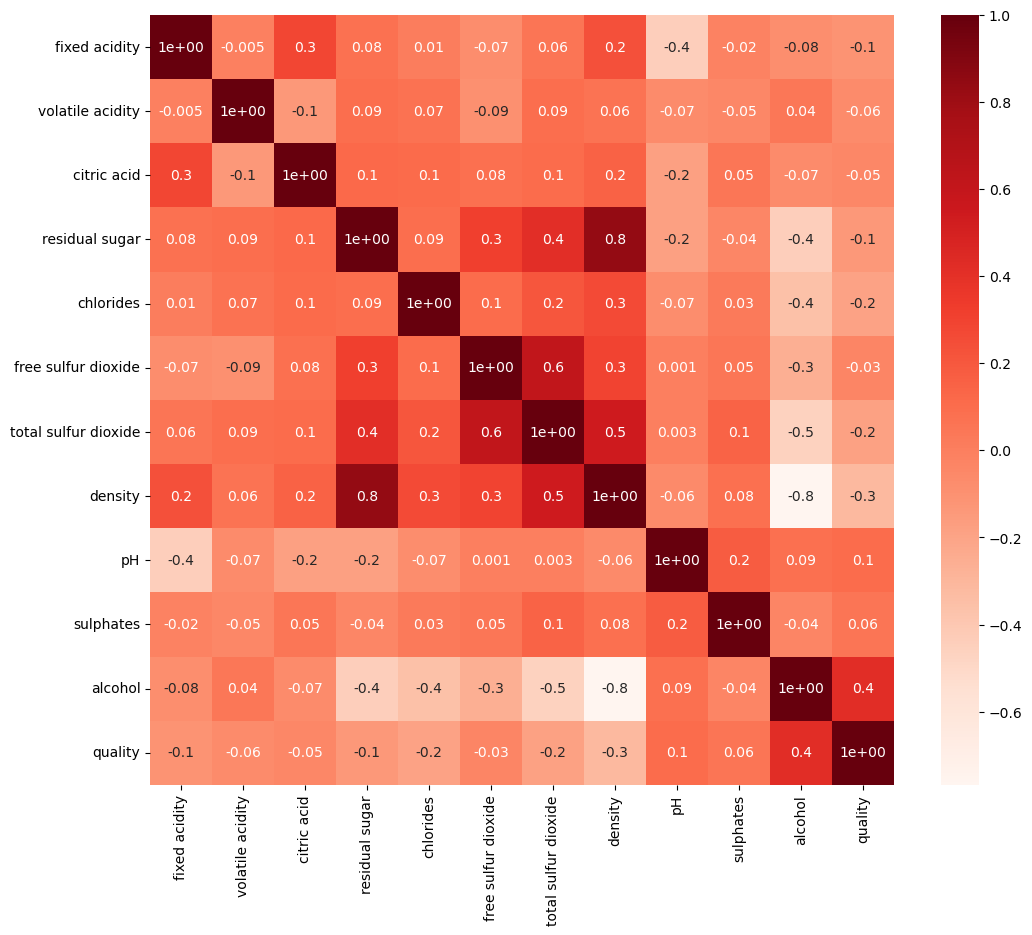

In [20]:
cor_heatmap(df.corr())

## 2. Modelling

[Feature scaling](#1st-bullet)

With our data prepared, it's time to create our models.<br>

Captions:
* mm - MinMaxScaler
* st - StandardScaler
* rb - RobustScaler

<b>1. Create an instance of `LogisticRegression()`, and fit it to unscaled training data</b>

In [21]:
lr = LogisticRegression().fit(X_train,y_train)

<b>2. For each scaling method seen above, create an instance of `LogisticRegression()`. To each instance fit a differently scaled version of our data, using the method `.fit()` with `X_train_scl_[SCALER NAME]` and `y_train` as parameters. Example: `X_train_scl_mm` is data scaled with the MinMaxScaler</b>

In [22]:
lr_mm = LogisticRegression().fit(X_train_mMscaled,y_train)

In [23]:
lr_st = LogisticRegression().fit(X_train_scl_st,y_train)

In [24]:
lr_rb = LogisticRegression().fit(X_train_Rscaled,y_train)

Note: It's normal for this message to show up when data is fit to a Logistic Regressor

<b>3. For all models, predict the values of the target in each train dataset using the method `.predict()`. For the models using scaled data with `X_train_sc_[SCALER NAME]` as a parameter, for each of the models defined. Assign those values to the objects `lr_[SCALER NAME]_pred`</b>

In [25]:
lr_pred = lr.predict(X_train)

In [26]:
lr_mMscaler_pred = lr_mm.predict(X_train_mMscaled)

In [27]:
lr_Rscaler_pred = lr_rb.predict(X_train_Rscaled)

In [93]:
lr_st_pred = lr_st.predict(X_train_scl_st)

<b>4. Now predict the values of the target in each validation dataset using the method `.predict()`. For the models using scaled data with `X_val_sc_[SCALER NAME]` as a parameter, for each of the models defined. Assign those values to the objects `lr_[SCALER NAME]_pred`</b>

In [94]:
lr_pred_val = lr.predict(X_test)
lr_mMscaler_pred_val = lr_mm.predict(X_test_mMscaled)
lr_Rscaler_pred_val = lr_rb.predict(X_test_Rscaled)
lr_st_pred_val = lr_st.predict(X_test_st)

## 3. Model Features

<b>1. To check the coefficients calculated by applying the linear regression, call the attribute `coef_` associated to each of your models.</b>

In [30]:
lr.coef_

array([[-0.25935132, -3.36506685, -1.3978094 ,  0.03349404, -0.87871977,
         0.01000869, -0.00402569, -3.44741296, -0.08155966,  1.17828934,
         0.87502467]])

In [31]:
lr_mm.coef_

array([[-0.32392129, -1.96863973, -0.71937447,  1.52337607, -1.73237429,
         1.30773573, -0.89757465, -0.83608704,  1.44494142,  1.18985132,
         5.18983641]])

In [32]:
lr_st.coef_

array([[ 0.37728366, -0.302719  , -0.1253798 ,  1.39718986, -0.19351532,
         0.13306897, -0.0331517 , -1.85724409,  0.55840691,  0.30196412,
         0.32689004]])

In [33]:
lr_rb.coef_

array([[ 0.37040902, -0.33335381, -0.13474182,  1.88761633, -0.14024919,
         0.19341019, -0.07019067, -2.26757055,  0.65871167,  0.31881349,
         0.70834733]])

Like in Linear Regression, in order to better understand what is the variable associated to each coefficient, let's convert the result to a DataFrame and define as headers the variables.

<b>2. Create a dataframe that will contain the values of the coefficients for your default model (the one without scaled data). Use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['base'].`` 

In [34]:
df_ = pd.DataFrame(lr.coef_[0],columns = ['base'])
df_

,base
0,-0.259351
1,-3.365067
2,-1.397809
3,0.033494
4,-0.878720
5,0.010009
6,-0.004026
7,-3.447413
8,-0.081560
9,1.178289


<b>3. Create a dataframe that will contain the values of the coefficients for your model using MinMax scaling. Use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['MinMax'].`` 

In [35]:
df_mm = pd.DataFrame(lr_mm.coef_[0],columns = ['base_mm'])
df_mm

,base_mm
0,-0.323921
1,-1.968640
2,-0.719374
3,1.523376
4,-1.732374
5,1.307736
6,-0.897575
7,-0.836087
8,1.444941
9,1.189851


<b>4. Create a dataframe that will contain the values of the coefficients for your model using Standard scaling. Use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['Standard'].`` 

In [36]:
df_st = pd.DataFrame(lr_st.coef_[0],columns = ['base_st'])
df_st

,base_st
0,0.377284
1,-0.302719
2,-0.125380
3,1.397190
4,-0.193515
5,0.133069
6,-0.033152
7,-1.857244
8,0.558407
9,0.301964


<b>5. Create a dataframe that will contain the values of the coefficients for your model using 'Robust'. But use ._coef[0] to get the coefficient array, WITHOUT it being inside another array. Set ``columns = ['Robust'].`` 

In [37]:
df_rb = pd.DataFrame(lr_rb.coef_[0],columns = ['base_rb'])
df_rb

,base_rb
0,0.370409
1,-0.333354
2,-0.134742
3,1.887616
4,-0.140249
5,0.193410
6,-0.070191
7,-2.267571
8,0.658712
9,0.318813


<b>6. Run the cell below to join the three Dataframes you created using the ``.join()`` method

In [38]:
df2 = df_.join(df_mm).join(df_st).join(df_rb)
df2

,base,base_mm,base_st,base_rb
0,-0.259351,-0.323921,0.377284,0.370409
1,-3.365067,-1.968640,-0.302719,-0.333354
2,-1.397809,-0.719374,-0.125380,-0.134742
3,0.033494,1.523376,1.397190,1.887616
4,-0.878720,-1.732374,-0.193515,-0.140249
5,0.010009,1.307736,0.133069,0.193410
6,-0.004026,-0.897575,-0.033152,-0.070191
7,-3.447413,-0.836087,-1.857244,-2.267571
8,-0.081560,1.444941,0.558407,0.658712
9,1.178289,1.189851,0.301964,0.318813


<b>7. By using the method `set_index()`, define the index of your composite Dataframe equal to the name of the features (you can get the feature names with `X_train.columns`)

In [43]:
df2 = df2.set_index(X_train.columns)
df2

,base,base_mm,base_st,base_rb
fixed acidity,-0.259351,-0.323921,0.377284,0.370409
volatile acidity,-3.365067,-1.968640,-0.302719,-0.333354
citric acid,-1.397809,-0.719374,-0.125380,-0.134742
residual sugar,0.033494,1.523376,1.397190,1.887616
chlorides,-0.878720,-1.732374,-0.193515,-0.140249
free sulfur dioxide,0.010009,1.307736,0.133069,0.193410
total sulfur dioxide,-0.004026,-0.897575,-0.033152,-0.070191
density,-3.447413,-0.836087,-1.857244,-2.267571
pH,-0.081560,1.444941,0.558407,0.658712
sulphates,1.178289,1.189851,0.301964,0.318813


<b>The independent term: </b>``.intercept_``



<b>8. To obtain the intercept of each regression, call the attribute `intercept_` associated to each of your models

In [44]:
lr.intercept_

array([-4.33837293])

In [45]:
lr_mm.intercept_

array([-3.59144931])

In [48]:
lr_rb.intercept_

array([-1.89178317])

In [47]:
lr_st.intercept_

array([-1.66647995])

## 4. Model assessment

<b>1. Using the method `.score()` check the mean accuracy of all models in the train dataset.</b>

In [59]:
lr.score(X_train, y_train)

0.7988338192419825

In [67]:
lr_mm.score(X_train_mMscaled,y_train)

0.8028425655976676

In [68]:
lr_rb.score(X_train_Rscaled,y_train)

0.8050291545189504

In [70]:
lr_st.score(X_train_scl_st,y_train)

0.8050291545189504

<b>2. Now check the mean accuracy for the validation dataset.</b>

In [76]:
lr.score(X_test, y_test)

0.8078231292517006

In [77]:
lr_mm.score(X_test_mMscaled, y_test)

0.8095238095238095

In [78]:
lr_rb.score(X_test_Rscaled, y_test)

0.8120748299319728

In [79]:
lr_st.score(X_test_st, y_test)

0.8120748299319728



For now, time to check the confusion matrix of the model for the training and the validation dataset.

<b>3. For all models, check the classification reports for the training dataset, passing as parameters the ground truth (`y_train`) and the predicted values (`lr_pred`, `lr_pred_mm`, and so on)</b><br>

In [88]:
print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2121
           1       0.61      0.30      0.41       623

    accuracy                           0.80      2744
   macro avg       0.72      0.62      0.64      2744
weighted avg       0.78      0.80      0.77      2744



In [89]:
print(classification_report(y_train, lr_mMscaler_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2121
           1       0.64      0.30      0.41       623

    accuracy                           0.80      2744
   macro avg       0.73      0.62      0.64      2744
weighted avg       0.78      0.80      0.77      2744



In [96]:
print(classification_report(y_train, lr_Rscaler_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2121
           1       0.63      0.35      0.45       623

    accuracy                           0.81      2744
   macro avg       0.73      0.64      0.66      2744
weighted avg       0.78      0.81      0.78      2744



In [95]:
print(classification_report(y_train, lr_st_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2121
           1       0.63      0.35      0.45       623

    accuracy                           0.81      2744
   macro avg       0.73      0.64      0.67      2744
weighted avg       0.78      0.81      0.78      2744



<b>4. Do the same for the validation dataset.</b>

In [101]:
print(classification_report(y_test, lr_pred_val))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       909
           1       0.66      0.32      0.43       267

    accuracy                           0.81      1176
   macro avg       0.74      0.63      0.66      1176
weighted avg       0.79      0.81      0.78      1176



In [102]:
print(classification_report(y_test, lr_st_pred_val))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       909
           1       0.65      0.37      0.47       267

    accuracy                           0.81      1176
   macro avg       0.74      0.65      0.68      1176
weighted avg       0.79      0.81      0.79      1176



In [104]:
print(classification_report(y_test, lr_Rscaler_pred_val))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89       909
           1       0.66      0.36      0.47       267

    accuracy                           0.81      1176
   macro avg       0.75      0.65      0.68      1176
weighted avg       0.79      0.81      0.79      1176



In [105]:
print(classification_report(y_test, lr_mMscaler_pred_val))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       909
           1       0.67      0.32      0.43       267

    accuracy                           0.81      1176
   macro avg       0.75      0.64      0.66      1176
weighted avg       0.79      0.81      0.78      1176



__Can we improve the results above?__ <br>

<br><br><br><br><br><br><br>Let's try with data partitions

## 5. Data partitions

Let's try K-Fold and Repeated K-Fold

<b>1. Import `KFold` and `RepeatedKFold` from `sklearn.model_selection`</b>

In [106]:
from sklearn.model_selection import KFold, RepeatedKFold

<b>2. Create a function named as `run_model_LR` that receives as parameters the dependent variable and the independent variables and returns a fitted Logistic Regression model to the data. </b>

In [121]:
def run_model_LR(X, y):
    return LogisticRegression().fit(X,y)

<b>3. Create a function named as `evaluate_model` that receives as parameters the model, the independent variables, the dependent variable, and the model's prevision, and returns the ``score`` method result, and the f1 score.</b>

In [130]:
import sklearn

In [131]:
def evaluate_model(model, X, y, prediction):
    return [model.score(X, y), sklearn.metrics.f1_score(y, prediction)]

<b>4. Run the cell below to create a function named `avg_scores_LR` that will return the average score value for the train and the test set. This will have as parameters the partition technique you are going to use, your dependent variable and your independent variables.</b>

In [132]:
def avg_scores_LR(method,X,y):
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []

    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = run_model_LR(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        value_train = evaluate_model(model, X_train, y_train, pred_train)
        value_test = evaluate_model(model,X_test,y_test,pred_test)
        score_train.append(value_train[0])
        score_test.append(value_test[0])
        f1_train.append(value_train[1])
        f1_test.append(value_test[1])

    print('Train score:', np.mean(score_train))
    print('Test score:', np.mean(score_test))
    
    print('Train f1:', np.mean(f1_train))
    print('Test f1:', np.mean(f1_test))
    

<b>5. Create a KFold Instance where the number of splits is 10 (*n_splits*) and name it as `kf`</b>

In [133]:
kf = KFold(n_splits=10)



<b>6. Call the function `avg_scores_LR` and check the average score for the train and the test sets using `kf`</b>





In [134]:
avg_scores_LR(kf, X, y)

Train score: 0.7992346938775511
Test score: 0.797704081632653
Train f1: 0.4142502483591306
Test f1: 0.35786519585487303


<b>7. Create a RepeatedKFold Instance where `n_splits = 7` and `n_repeats = 3` and name it as `rkf`. Then, Call the function `avg_scores_LR` and check the average score for the train and the test sets using `rkf`</b>

In [139]:
rkf = RepeatedKFold(n_splits = 7, n_repeats=3)

In [140]:
avg_scores_LR(rkf, X, y)

Train score: 0.7997448979591836
Test score: 0.796938775510204
Train f1: 0.4143300571846926
Test f1: 0.4058923985606056


## 6. Deploy

What we really want to do is classify the unclassified data. So, after being already satisfied with our model, we can now predict the target to the new dataset.

<b>1. Import the dataset from `Datasets/wq_classify` and save it in a variable</b>

In [143]:
data = pd.read_csv("Datasets/wq_classify.csv")
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.25,0.37,2.6,0.050,24.0,132.0,0.99138,3.04,0.53,11.2
1,7.3,0.36,0.34,14.8,0.057,46.0,173.0,0.99751,3.14,0.57,10.2


<b>2. Using the `.predict()` method and the model you consider the best (one of `lr`, `lr_mm`, `lr_st`, `lr_rb`), predict the target on the new dataset, and assign each set of values to a variable. Then, assign the variable to a column named `quality_lr`</b>

In [160]:
standardizer = StandardScaler()
data_standardized = standardizer.fit_transform(data)


In [161]:
lr_st.predict(data_standardized)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [162]:
data["Predicted (SLR)"] = lr_st.predict(data_standardized)

<b>3. Check the new dataset.</b>

In [163]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Predicted (SLR)
0,7.4,0.25,0.37,2.6,0.050,24.0,132.0,0.99138,3.04,0.53,11.2,0
1,7.3,0.36,0.34,14.8,0.057,46.0,173.0,0.99751,3.14,0.57,10.2,0
2,6.7,0.31,0.30,2.4,0.038,30.0,83.0,0.98867,3.09,0.36,12.8,1
3,8.6,0.31,0.30,0.9,0.045,16.0,109.0,0.99249,2.95,0.39,10.1,0
4,8.6,0.31,0.30,0.9,0.045,16.0,109.0,0.99249,2.95,0.39,10.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
973,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
974,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
975,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
976,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


Now we have already predicted the target for our new dataset!

Sources:

https://medium.com/@syedar.sohail/outlier-handling-using-robust-scaler-a-python-tutorial-613d174b58eb